# Bank Churn Analysis

## Problem Statement
The high rate of customers leaving banks (churn rate) suggests deficiencies in several areas, including customer experience, operational efficiency, and the competitiveness of products and features. This necessitates a focus on understanding and managing customer churn to improve overall customer satisfaction and achieve sustainable growth.

## Objective
If a customer churns, it means they left the bank and took their business elsewhere. If you can predict which customers are likely to churn, you can take measures to retain them before they do.

**Imports**

In [57]:
# For data manipulation
import numpy as np
import pandas as pd

In [58]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Load Dataset**

In [60]:
# Load dataset into a dataframe
# df = pd.read_csv('', index_col = 0) | use this to remove index column
df = pd.read_csv('Churn_Modelling.csv')


# Display first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Discovery

In [61]:
# How large the dataset is. Total values across the whole data
print(df.size)

# Gather basic information about the data
df.info()

140000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Dataset contains 14 variables and 10000 rows, totaling 140,000 values. 
- Each row represents a bank customer and the columns stores the customer's bank information
- There are 7 Numeric variables: RowNumber, CustomerId ,CreditScore, Age, Tenure, Balance, Estimated Salary   
- There are 6 categorical variables: Gender, Geography, NumOfProducts, HasCrCard, IsActiveMember, Exited. 
- There is 1 text variable: Surname

**Quick Stats**

In [62]:
def describe(df):
    df = df.drop(['Surname','Geography','Gender'], axis=1)  #drop categorical variables
    return pd.concat([df.describe().T,
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt')
                     ], axis=1).T

describe(df)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000
skew,0.00000,1.149146e-03,-0.071607,1.011320,0.010991,-0.141109,0.745568,-0.901812,-0.060437,0.002085,1.471611
kurt,-1.20000,-1.196113e+00,-0.425726,1.395347,-1.165225,-1.489412,0.582981,-1.186973,-1.996747,-1.181518,0.165671


- `Credit Score` ranges from 350 - 850 with a slight skew to the left
- Customers `age` ranges from 18 - 92 and averages around 38 years old. 
- On average, customers `tenure` is around 5 years 
- On average, the customers' account `balance` ranges from $0 to $250K.
- Customers' `estimated salary` ranges from $11.58 to $199K


## Data Preprocessing

**Drop variables**
- The `CustomerId` and `Surname` variable has sensitive customer data and should be removed to maintain confidentally. 
- `RowNumber` can also be removed has it is just a counter. 

In [63]:
df = df.drop(['CustomerId','Surname','RowNumber'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Rename 'Exited' to 'Churned'**


In [64]:
df = df.rename(columns={'Exited': 'Churned'})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check for missing values**

In [65]:
print('Missing values per column:')
df.isna().sum()

Missing values per column:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64

**Check for duplicates**

In [66]:
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

df_row = len(df)
df_row_no_dupe = len(df.drop_duplicates())
df_row_dupe = df_row - df_row_no_dupe

print('No. of rows with duplicates :', df_row_dupe)

Shape of dataframe: (10000, 11)
Shape of dataframe with duplicates dropped: (10000, 11)
No. of rows with duplicates : 0


**Check for outliers**

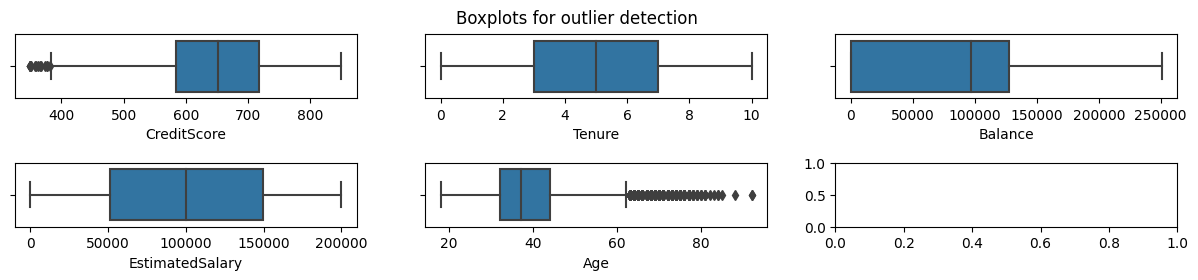

In [67]:
# create 2 row x 3 column figure
fig, axes = plt.subplots(2, 3, figsize=(15, 2.5))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=df['CreditScore'])
sns.boxplot(ax=axes[0,1], x=df['Tenure'])
sns.boxplot(ax=axes[0,2], x=df['Balance'])

# add spacing between the rows
plt.subplots_adjust(hspace=1
                    # left=0.1,
                    # bottom=0.1, 
                    # right=0.9, 
                    # top=0.9, 
                    # wspace=0.4
                    ) 

sns.boxplot(ax=axes[1,0], x=df['EstimatedSalary'])
sns.boxplot(ax=axes[1,1], x=df['Age'])
plt.show();

- `CreditScore` has some outliers for scores under 400
-  Customers over `Age` 60 are outliers. 

## EDA

**Target Variable = `Churned`**

**Class Imbalance**

In [68]:
# Get percentage of distinct values
df['Churned'].value_counts(normalize=True)*100

Churned
0    79.63
1    20.37
Name: proportion, dtype: float64

- Of 10,000 customers, at least 20% of the customers have churned
- Since `Churned` is Categorical, check Class Imbalance
- When predicting a categorical target, problems can arise when the class distribution is highly imbalanced. 
- `Churned`is split ~80-20 which is imbalance but is still fine.

### Feature Engineering

#### CreditScore

mean 651


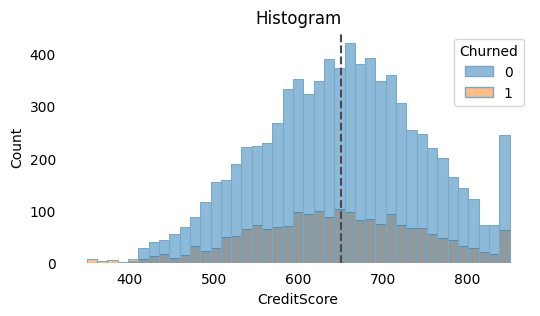

In [69]:
# Assign variable to x
x = 'CreditScore'

# Plot Histogram
fig = plt.figure(figsize=(6,3))
ax = sns.histplot(x=df[x], hue=df['Churned'], color='#b3cede', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

#Calculate and display mean 
mean = df[x].mean()
print('mean',f'{mean:.0f}')
plt.axvline(mean, color='#494949', linestyle='--')
None

- CreditScore has a relatively normal distribution, with mean around a score of 651. 
- A little more than 300 customers achieved perfect Credit Score 


According to FICO, Credit Score rating as categorized as follows
- Very poor: 300 to 579
- Fair: 580 to 669
- Good: 670 to 739
- Very good: 740 to 799
- Excellent: 800 to 850

#### CreditRating

**Feature Engineering:**

Create a new variable `CreditRating` to assign each CreditScore to a rating

In [70]:
# Create a new 'CreditRating' variable and assign based FICO ranges

df['CreditRating'] = np.select(
    [df['CreditScore'] <=579,
     df['CreditScore'].between(580, 669),
     df['CreditScore'].between(670, 739),
     df['CreditScore'].between(740, 799),
     df['CreditScore'].between(800, 859)],
    ['Very Poor', 'Fair', 'Good', 'Very Good','Excellent']
    )

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,CreditRating
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very Poor
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


**Plot CreditRating vs Churned**

Let's see the churn rate for each Credit Rating

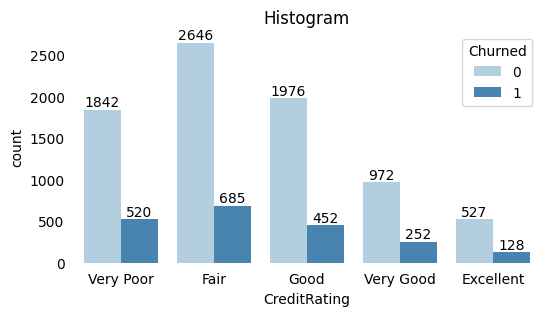

In [71]:
# Histogram
x = 'CreditRating'
fig = plt.figure(figsize=(6,3))
ax = sns.countplot(x=df[x], order=['Very Poor', 'Fair', 'Good', 'Very Good','Excellent'], hue=df['Churned'],palette="Blues")
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')
None

- Customers with 'Fair' credit rating has the highest churn count at 685, followed by 520 with 'Very Poor' and 452 with 'Good' credit rating, respectively. 

Let's calculate the churn rate for each rating based on the total count.

In [72]:
# Calculate churn rate
ratings = df['CreditRating'].unique().tolist()

for rating in ratings:
    count = df[(df['CreditRating'] == rating)].shape[0]
    churned_count = df[(df['CreditRating'] == rating) & (df['Churned'] == 1)].shape[0]
    percent_churned = (churned_count/count) * 100
    print(f'Percent churned in {rating} {percent_churned:.1f}%')


Percent churned in Fair 20.6%
Percent churned in Very Poor 22.0%
Percent churned in Good 18.6%
Percent churned in Excellent 19.5%
Percent churned in Very Good 20.6%


- The highest churn rate occurs when the customer has a 'Very Poor' credit rating. 
- Whereas the churn rate for 'Fair' ranked 2nd at 20.6% although it had the highest count of churned customers. 
- In general, all credit ratings experience similar churn rates averaging around ~20%. 
- Are they dependencies between very poor credit card and whether the customer has a credit card or not?

#### Credit Score vs. HasCrCard

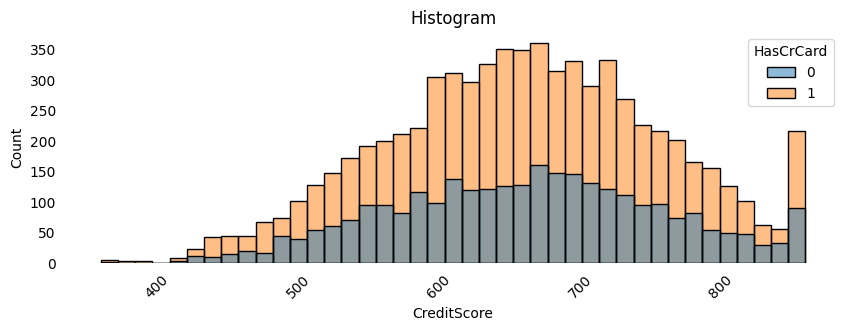

In [73]:


# Plot Histogram
fig = plt.figure(figsize=(10,3))
ax = sns.histplot(x=df['CreditScore'],hue=df['HasCrCard'])
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

- The customers' credit score has a normal distribution regardless if the customer has a credit card or not. However, their are more customers with a credit card. 
- Therefore, having a credit card or not does not affect a customer's credit score.

#### Age

**Feature Engineering:**
Let's first create bins for age group before plotting

In [74]:
# create interval range 
interval_range = pd.interval_range(start=0, freq=10, end=100)

# create a new column applying the bins
df['AgeBins'] = pd.cut(df['Age'], bins=interval_range, labels=[1,2,3])

# show original and new column with bins
df[['Age','AgeBins']].head()

,Age,AgeBins
0,42,"(40, 50]"
1,41,"(40, 50]"
2,42,"(40, 50]"
3,39,"(30, 40]"
4,43,"(40, 50]"


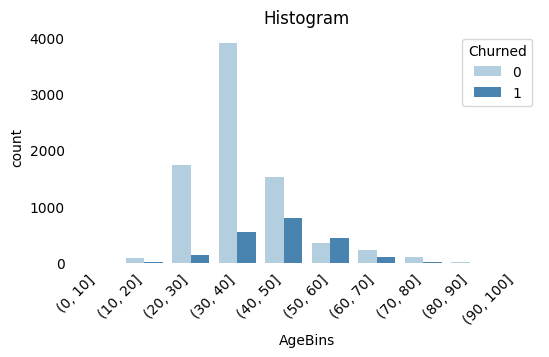

In [75]:
# Assign variable to x
x = 'AgeBins'

# Plot Histogram
fig = plt.figure(figsize=(6,3))
ax = sns.countplot(x=df[x], hue=df['Churned'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

- Customers' age follow a right skewed distribution with majority between 30-40 years old. 
- Highest churn count is between 40-50 age group 

Let's look at Balance by Age group

#### Age Vs Balance

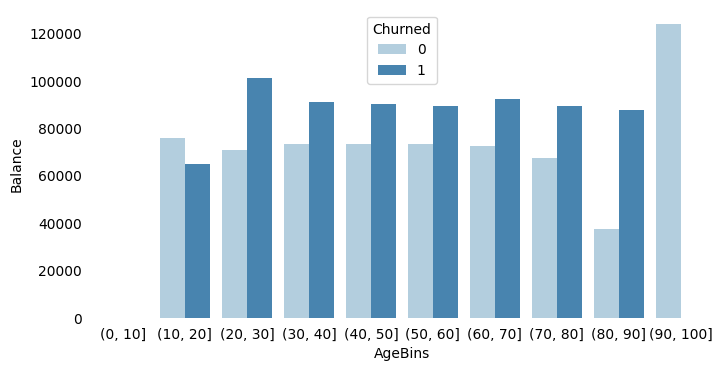

In [76]:
fig = plt.figure(figsize=(8,4))
ax = sns.barplot(x=df['AgeBins'], y=df['Balance'], hue=df['Churned'],palette='Blues', errorbar=None)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
None

- The balance has a uniform distribution across the age groups
- For the majority of the age groups, customers with Balances over $80K have churned.
    - Are there less interests/perks after reaching accumulating $80K?
    - Can look at increasing perks once customers reach $80K balance to retent customers. 

#### Age vs CreditScore

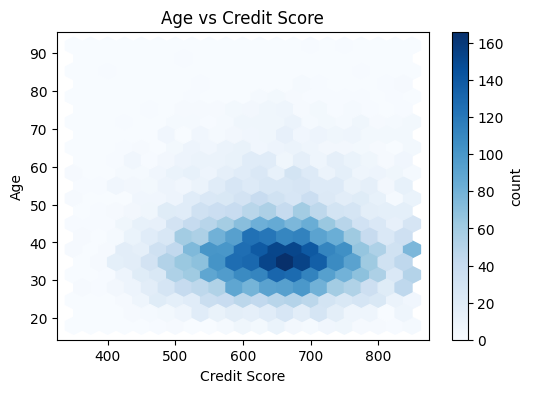

In [77]:
# plot hexbin
fig = plt.figure(figsize=(6,4))
plt.hexbin(x=df['CreditScore'], y=df['Age'], gridsize=20, cmap='Blues')
cb = plt.colorbar(label='count')
ax.tick_params(left=False, bottom=False) # Remove ticks

# Set the x-axis label.
plt.xlabel("Credit Score")

# Set the y-axis label.
plt.ylabel("Age")

# Set the title.
plt.title("Age vs Credit Score")
None


- majority of 30-40 years old customers have Credit Score of 650

#### Age vs EstimatedSalary

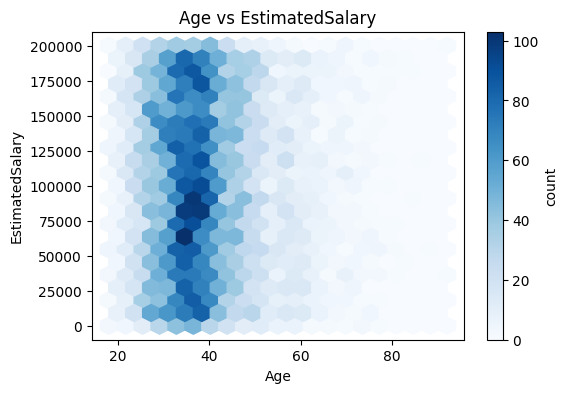

In [78]:
# plot hexbin
fig = plt.figure(figsize=(6,4))
plt.hexbin(x=df['Age'], y=df['EstimatedSalary'], gridsize=20, cmap='Blues')
cb = plt.colorbar(label='count')
ax.tick_params(left=False, bottom=False) # Remove ticks

# Set the x-axis label.
plt.xlabel("Age")

# Set the y-axis label.
plt.ylabel("EstimatedSalary")

# Set the title.
plt.title("Age vs EstimatedSalary")
None


### Geography

In [79]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

- Customers are from 3 countries: France, Germany, and Spain. 
- Over half are customers from France and the rest are split almost evenly between Germany and Spain

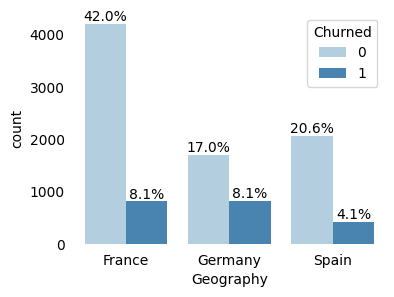

In [80]:
# Plot histogram
fig = plt.figure(figsize=(4,3))
ax = sns.countplot(x=df['Geography'], order=df['Geography'].value_counts(ascending=False).index, hue=df['Churned'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

In [81]:
# Calculate churn rate for each country
countries = df['Geography'].unique().tolist()

for country in countries:
    count = df[(df['Geography'] == country)].shape[0]
    churned_count = df[(df['Geography'] == country) & (df['Churned'] == 1)].shape[0]
    percent_churned = (churned_count/count) * 100
    print(f'Percent churned in {country} {percent_churned:.1f}%')


Percent churned in France 16.2%
Percent churned in Spain 16.7%
Percent churned in Germany 32.4%


- Germany has the highest churn percentage at ~32%
- Whereas France and Spain are similar around ~16%

Based on this calculation, improvement efforts should be carried out in Germany to increase retention rate. 

- But let's check average customer balance for each country to gain additional insight

### Balance vs Geography vs Churned

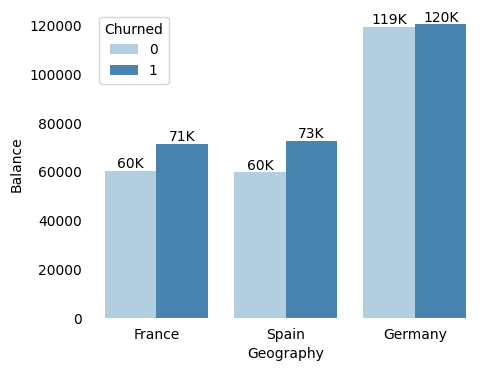

In [82]:
fig = plt.figure(figsize=(5,4))
ax = sns.barplot(x=df['Geography'], y=df['Balance'], hue=df['Churned'], palette='Blues', errorbar=None)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f'{height/1000:.0f}K'

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- In Germany, balance amount for churned customers reached 120K, which is 50% of the total balance in Germany!
- Despite having the most customers, France's balance is just half of Germany's
- This validates the significance of prioritizing improvements in Germany

### Balance

mean 76486


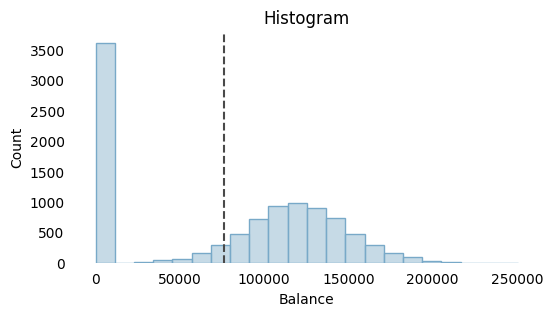

In [83]:
# Assign variable to x
x = 'Balance'

# Plot Histogram
fig = plt.figure(figsize=(6,3))
ax = sns.histplot(x=df[x], color='#b3cede', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

#Calculate and display mean 
mean = df[x].mean()
print('mean',f'{mean:.0f}')
plt.axvline(mean, color='#494949', linestyle='--')
None

- Over 3500 customers or 35% of the customers have 0 balance. 
- If these customers are excluded, the balance data would follow a normal distribution
- What would cause customers to have bank account with no balance? Are they transferring money out of their account in preparation to exit? 
- Let's take a deeper dive into customers with 0 balance.

**Filter customers with zero Balance**

In [84]:
# Create a Boolean mask 
mask = (df['Balance'] == 0)   
df_mask = df[mask]
df_mask.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,CreditRating,AgeBins
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,Fair,"(40, 50]"
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0,Good,"(30, 40]"
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0,Excellent,"(40, 50]"
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,Very Poor,"(20, 30]"
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0,Very Poor,"(30, 40]"


**Plot**

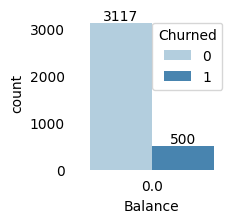

In [85]:
fig = plt.figure(figsize=(2,2))
ax = sns.countplot(x=df_mask['Balance'], hue=df_mask['Churned'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- 500 customers with no balance have churned. 
- Considering around a total of 2000 customers have churned, this is a significant amount as it's ~25% of the total customers that has churned 
- Let's look at other variables to determine if they have any cause/effect relationship with customers who have no balance in their account


**Create another mask for customers with 0 balance and have churned**

In [86]:
# Create a Boolean mask 
mask = (df['Balance'] == 0) &  (df['Churned'] == 1)
df_mask_churn = df[mask]
df_mask_churn.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,CreditRating,AgeBins
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,Fair,"(40, 50]"
22,510,Spain,Female,38,4,0.0,1,1,0,118913.53,1,Very Poor,"(30, 40]"
30,591,Spain,Female,39,3,0.0,3,1,0,140469.38,1,Fair,"(30, 40]"
58,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1,Very Poor,"(60, 70]"
81,777,France,Female,32,2,0.0,1,1,0,136458.19,1,Very Good,"(30, 40]"


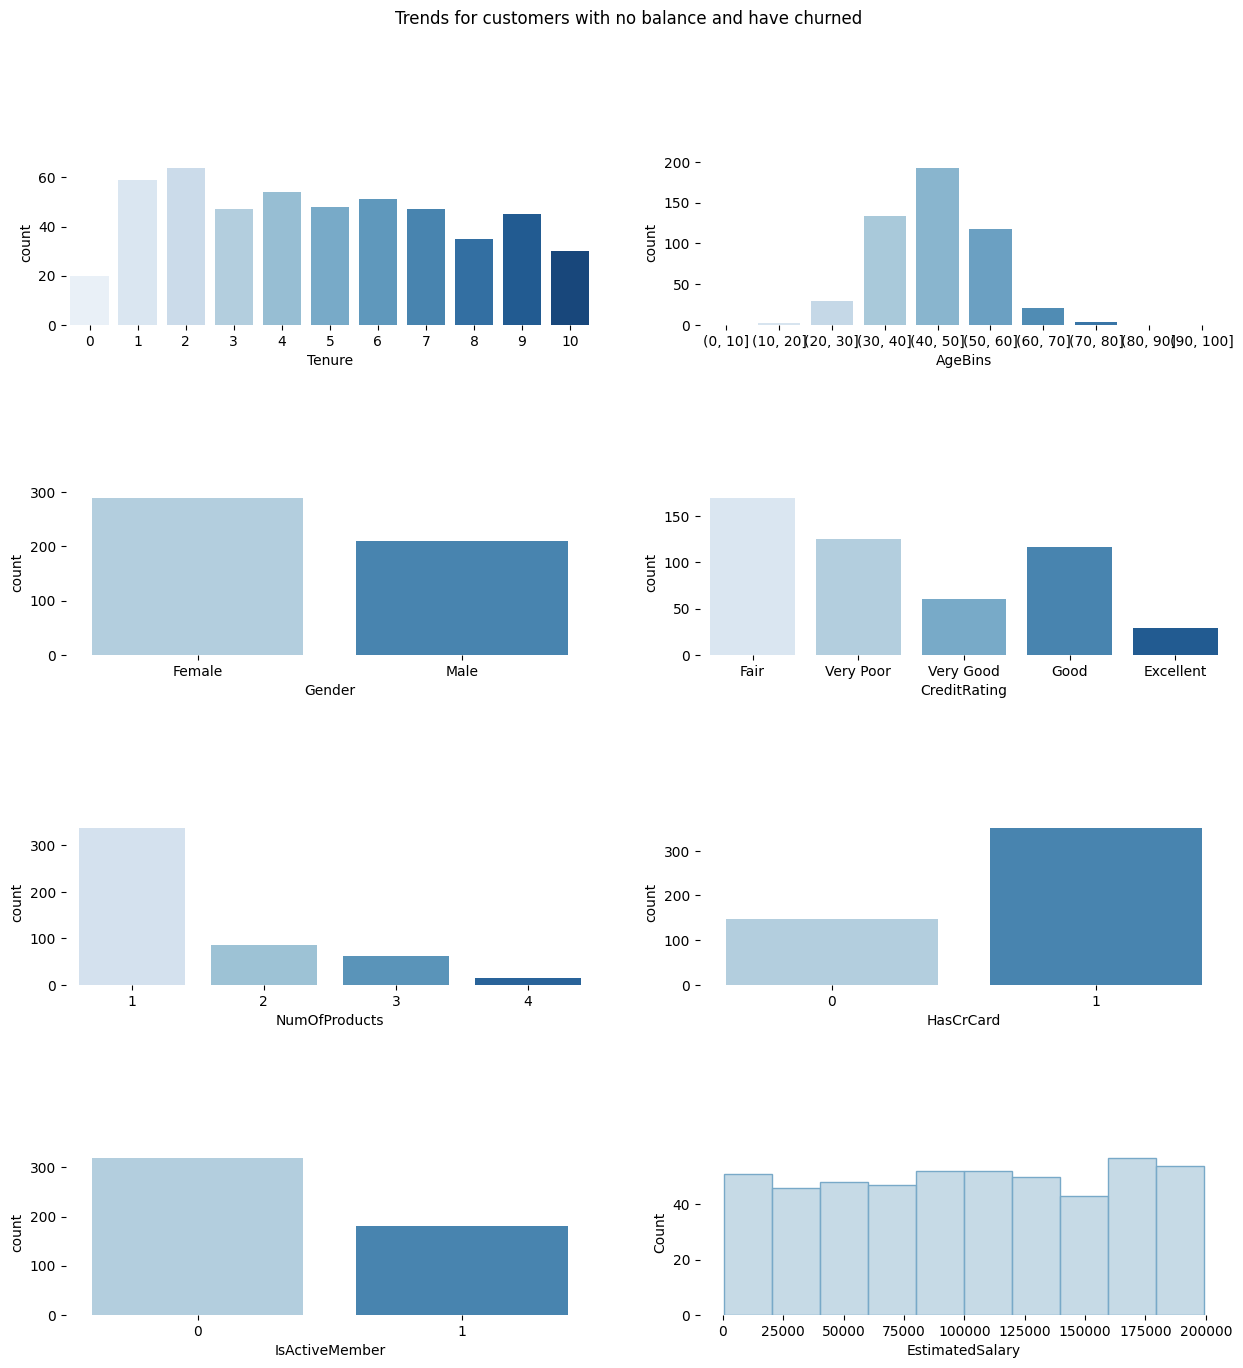

In [87]:
# create 4 row x 2 column figure
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Trends for customers with no balance and have churned')
sns.countplot(ax=axes[0,0], x=df_mask_churn['Tenure'], palette='Blues')
sns.countplot(ax=axes[0,1], x=df_mask_churn['AgeBins'], palette='Blues')
sns.countplot(ax=axes[1,0], x=df_mask_churn['Gender'], palette='Blues')
sns.countplot(ax=axes[1,1], x=df_mask_churn['CreditRating'], palette='Blues')
sns.countplot(ax=axes[2,0], x=df_mask_churn['NumOfProducts'], palette='Blues')
sns.countplot(ax=axes[2,1], x=df_mask_churn['HasCrCard'], palette='Blues')
sns.countplot(ax=axes[3,0], x=df_mask_churn['IsActiveMember'], palette='Blues')
sns.histplot(ax=axes[3,1], x=df_mask_churn['EstimatedSalary'], color='#b3cede', edgecolor='#78a9c8')

# Remove ticks
ax.tick_params(left=False, bottom=False) 

# Remove borders borders
sns.despine(left=True, bottom=True) 

# add spacing between the rows
plt.subplots_adjust(hspace=1
                    # left=0.1,
                    # bottom=0.1, 
                    # right=0.9, 
                    # top=0.9, 
                    # wspace=0.4
                    ) 

plt.show();

Some noticeable observations for customer with no balance in their account....
- ~200 are around 30-40 years old
- ~300 have 1 product
- 300+ have a credit card
- 300+ are not an active number

For now, having a credit card and inactivity has the strongest link to customers with 0 balance. Let's look at those two variables

### HasCrCard

In [88]:
# Separate numerical and categorical variables into different df
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

70% of the customers have a credit card

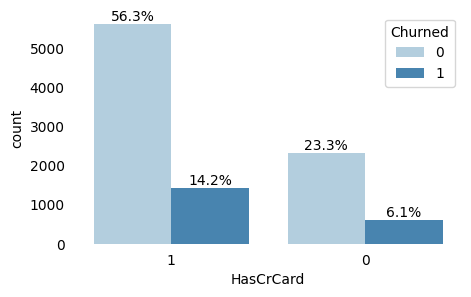

In [89]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['HasCrCard'], order=df['HasCrCard'].value_counts(ascending=False).index, hue=df['Churned'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- Customers with a credit card is 2x more likely to churn then those who doesnt. 
- Could there be unsatisfactory customer service/terms for the credit card users?


### IsActiveMember


In [90]:
# Separate numerical and categorical variables into different df
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

About half of the customers are active and half are inactive

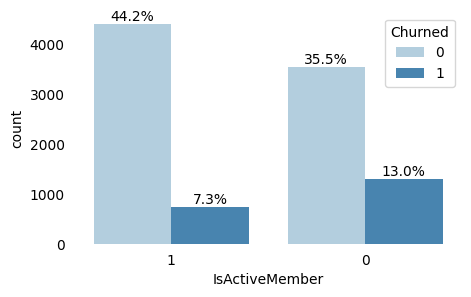

In [91]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['IsActiveMember'], order=df['IsActiveMember'].value_counts(ascending=False).index, hue=df['Churned'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- Active members are less likely to churn compared to Non active customers. 

### NumOfProducts

In [92]:
# Separate numerical and categorical variables into different df
df['NumOfProducts'].value_counts()


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

There are up to 4 number of products a customer can hold. The majority of customers have only 1-2 products and very few has 3-4 products.

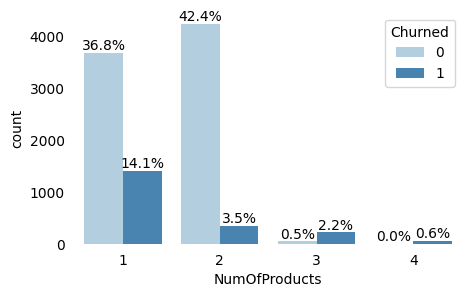

In [93]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['NumOfProducts'], order=df['NumOfProducts'].value_counts(ascending=False).index, hue=df['Churned'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- Customers with 1 product has highest churn count. 
- One suggestion could be to promote deals/perks if customers sign up for another product as they are less likely to churn if they have at least 2 products with the bank. 

### Gender

In [94]:
# Separate numerical and categorical variables into different df
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

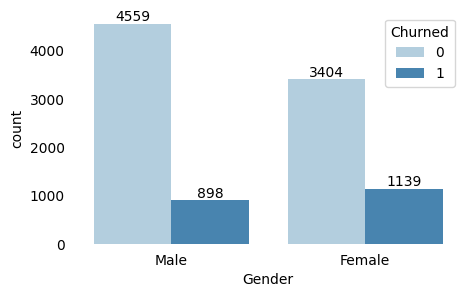

In [95]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['Gender'], order=df['Gender'].value_counts(ascending=False).index, hue=df['Churned'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- females are slightly more inclined to churn than male customers.

### Estimated Salary

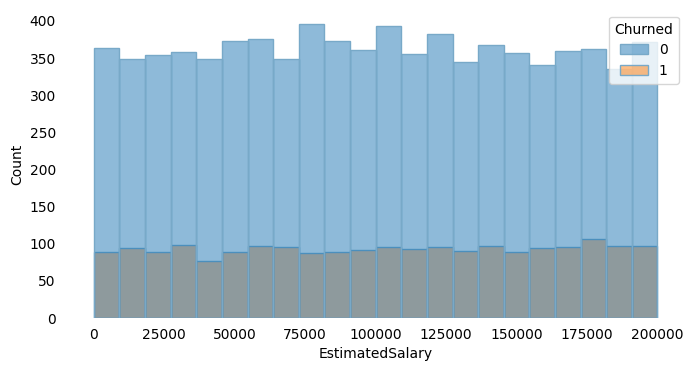

In [96]:
fig = plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['EstimatedSalary'], hue=df['Churned'],color='#b3cede', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# # Loop through bars and add percentage labels
# for patch in ax.patches:
#     height = patch.get_height()
#     label = f"{height:.0f}"  # Format as percentage with one decimal

#     # Place the label at the top center of the bar
#     x = patch.get_x() + patch.get_width() / 2 
#     y = patch.get_height() + 0.1  # Adjust y position for better placement

#     ax.text(x, y, label, ha='center', va='bottom')

- There's a uniform distribution of salary across all customers.
- This is true for churned customers as well. 
- Estimated Salary doesnt seem to affect churn rate

### Tenure

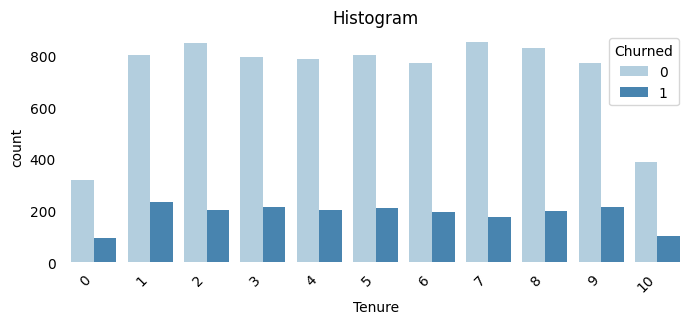

In [97]:
# Assign variable to x
x = 'Tenure'

# Plot Histogram
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(x=df[x], hue=df['Churned'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

- There's a uniform distribution for tenure. 
- The churn amount hovers around 200 people for almost tenure periods. 
- In summary, the churn rate doesnt seem to be affected by tenure. 

## EDA Summary

**Variables with minimal impact on churn rate**
- Churn rate is uniform across tenure period, credit ratings and Estimated Salary, which means this variables have little influence on churn rate.

**Variables with potential impact on churn rate**
-  Age 
    - Highest churn count is between 40-50 age group 
    - For the majority of the age groups, customers with Balances over $80K have churned.
    - Are there less interests/perks after reaching accumulating $80K?
- Geography 
    - Germany has the highest churn percentage at ~32%, whereas France and Spain are similar around ~16%
    - In Germany, balance amount for churned customers reached 120K, which is 50% of the total balance in Germany!
    - Despite having the most customers, France's balance is just half of Germany's
- Credit Card
    - Customers with a credit card is 2x more likely to churn then those who doesnt. 
- Active Members
    - Active members are less likely to churn compared to Non active customers. 
- Num Of Products
    - Customers with 1 product has highest churn count. 

- Gender
    - females are slightly more inclined to churn than male customers.
- Balance 
    - Over 3500 customers or 35% of the customers have 0 balance.
    - 500 customers with no balance have churned. 
    - Considering around a total of 2000 customers have churned, this is a significant amount as it's ~25% of the total customers that has churned 
    - Having a credit card and inactivity has the strongest link to customers with 0 balance. Let's look at those two variables

**Recommendations for Customer Retention**
- This validates the significance of prioritizing improvements in Germany
- Can look at increasing perks once customers reach $80K balance to retent customers.
- Could there be unsatisfactory customer service/terms for the credit card users?
- One suggestion could be to promote deals/perks if customers sign up for another product as they are less likely to churn if they have at least 2 products with the bank. 



## Modeling

### Correlation between Variables

First, encode categorical variables 
- Use One Hot Encoding method since both Geography, Gender are nonordinal 

**Gender**

In [98]:
# create a copy of df and assign new name
df_code = df.copy()
df_code.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,CreditRating,AgeBins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,"(40, 50]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,"(40, 50]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very Poor,"(40, 50]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,"(30, 40]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,"(40, 50]"


In [99]:
#c ange variable type
df_code['Gender'] = df['Gender'].astype("category")

# Create new column representing numerical value of Categorical Column 
df_code['GenderCode'] = df_code['Gender'].cat.codes

# show df
df_code[['Gender','GenderCode']].head(10)


,Gender,GenderCode
0,Female,0
1,Female,0
2,Female,0
3,Female,0
4,Female,0
5,Male,1
6,Male,1
7,Female,0
8,Male,1
9,Male,1


**Geography**

In [100]:
#c ange variable type
df_code['Geography'] = df['Geography'].astype("category")

# Create new column representing numerical value of Categorical Column 
df_code['GeographyCode'] = df_code['Geography'].cat.codes

# show df
df_code[['Geography','GeographyCode']].head(10)


,Geography,GeographyCode
0,France,0
1,Spain,2
2,France,0
3,France,0
4,Spain,2
5,Spain,2
6,France,0
7,Germany,1
8,France,0
9,France,0


**CreditRating**

In [101]:
# Create new column representing numerical value for Ordinal (discrete but ranked) Column 'X'
df_code['CreditRating'] = df_code['CreditRating'].map({'Very Poor': 1,
                                                        'Fair': 2,
                                                        'Good': 3,
                                                        'Very Good': 4,
                                                        'Excellent':5}
                                                        )
# show df
df_code['CreditRating'].head()

0    2
1    2
2    1
3    3
4    5
Name: CreditRating, dtype: int64

In [102]:
df_code.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,CreditRating,AgeBins,GenderCode,GeographyCode
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,"(40, 50]",0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,"(40, 50]",0,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,"(40, 50]",0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3,"(30, 40]",0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,"(40, 50]",0,2


### Correlation Matrix

**Drop redundant columns**

In [103]:
df_model = df_code.drop(['Geography','Gender','AgeBins','CreditScore','EstimatedSalary','Tenure'],axis=1)

**Heatmap**

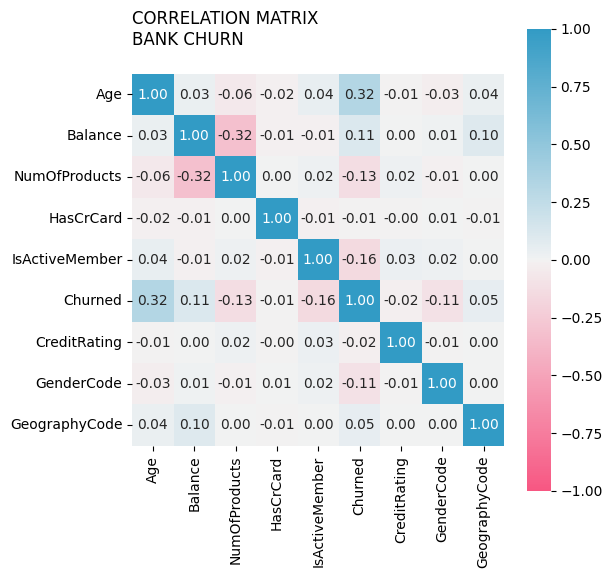

In [106]:
# Create heatmap to check correlation between variables
plt.figure(figsize=(6, 6))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


# If not dropping any variables use df.corr()
sns.heatmap(df_model.corr(method='spearman'), 
            square=True, 
            fmt=".2f", 
            annot=True, 
            vmin = -1, 
            vmax = 1, 
            cmap=cmap)

ax.set_ylim([0,2])
ax.set_xlim([0,2])
# plt.xticks([-6.5,1.5],labels=[1,0])
# plt.yticks([-6.5,1.5],labels=[1,0])

# title
title = 'CORRELATION MATRIX\nBANK CHURN\n'
plt.title(title, loc='left', fontsize=12)

# Display plot
plt.show()

Positive Correlations
- 0.32: Churned & Age
- 0.11: Churned & Balance
- 0.05: Churned & Geography

Negative Correlations
- -0.16: Churned & IsActiveMember
- -0.13: Churned & NumOfProducts
- -0.11: Churned & GenderCode

most likely drop  
- 0.10: Geography & Balance
- 0.32: NumofProducts & Balance